<a href="https://colab.research.google.com/github/ManasChandan/deep-learning-series/blob/master/Deep_Learning_2_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Getting the intial imports

import tensorflow
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

keras.utils.set_random_seed(42)

In [3]:
# Getting the Fashion Mnist Dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
x_train.shape[1:], len(np.unique(y_train))

((28, 28), 10)

In [10]:
# Creating the network

# The input
input = keras.Input(shape=x_train.shape[1:])

# The flattended
flat_image = keras.layers.Flatten(name="flatening")(input)

# A simple 2 layer 256 Neuron
layer_1 = keras.layers.Dense(256, activation="relu", name="layer_1")(flat_image)
layer_2 = keras.layers.Dense(256, activation="relu", name="layer_2")(layer_1)

# An output layer with softmax regressor
output = keras.layers.Dense(len(np.unique(y_train)), activation="softmax", name="output")(layer_2)

# The model
model = keras.Model(inputs=input, outputs=output, name="CNN1")

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [12]:
# Fitting the model
history = model.fit(
    x_train,
    y_train,
    epochs=30,
    validation_split=0.2,
    verbose=1,
    batch_size=64
)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7091 - loss: 8.8760 - val_accuracy: 0.7950 - val_loss: 0.7827
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7931 - loss: 0.6675 - val_accuracy: 0.8068 - val_loss: 0.6230
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8212 - loss: 0.5258 - val_accuracy: 0.8166 - val_loss: 0.5632
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8235 - loss: 0.5143 - val_accuracy: 0.8307 - val_loss: 0.5331
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8361 - loss: 0.4726 - val_accuracy: 0.8422 - val_loss: 0.4567
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8449 - loss: 0.4528 - val_accuracy: 0.8289 - val_loss: 0.4938
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8456 - loss: 0.4421 - val_accuracy: 0.8431 - val_loss: 0.4826
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8464 - loss: 0.4317 - val_accuracy: 0.

<Axes: >

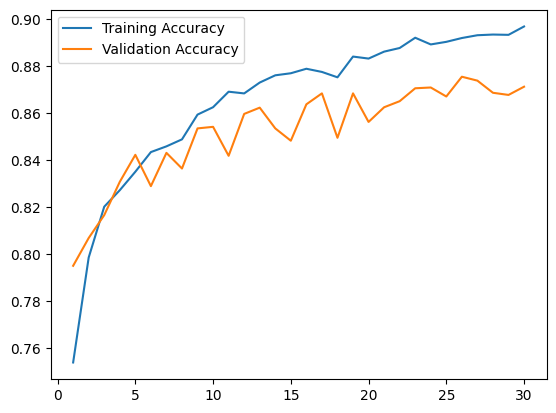

In [13]:
sns.lineplot(
    data=history.history,
    x=range(1, len(history.history['accuracy']) + 1),
    y=history.history['accuracy'],
    label='Training Accuracy'
)

sns.lineplot(
    data=history.history,
    x=range(1, len(history.history['accuracy']) + 1),
    y=history.history['val_accuracy'],
    label='Validation Accuracy'
)

In [14]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8610 - loss: 0.4715


[0.4549619257450104, 0.8618000149726868]